<a href="https://colab.research.google.com/github/Y-sebaei/Authorship-Recognition-For-Large-Language-Models/blob/main/Bachelor2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [ ]:
import pandas as pd

# Load JSON Lines file into a DataFrame
file_path = "Bachtrain1.jsonl"
df = pd.read_json(file_path, lines=True)

df.to_csv("dataset3.csv", index=False)

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer


tokenized_text = [text.split() for text in df['text']]


word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)


word_embeddings = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0)
                   for words in tokenized_text]


tfidf_vectorizer = TfidfVectorizer()


tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

df['text_length'] = df['text'].apply(len)

In [ ]:
df.shape

(4583, 6)

In [ ]:
df.head()

,text,model,source,label,id,text_length
0,Forza Motorsport is a popular racing game that...,chatGPT,wikihow,1,0,2244
1,Buying Virtual Console games for your Nintendo...,chatGPT,wikihow,1,1,3728
2,Windows NT 4.0 was a popular operating system ...,chatGPT,wikihow,1,2,5237
3,How to Make Perfume\n\nPerfume is a great way ...,chatGPT,wikihow,1,3,4729
4,How to Convert Song Lyrics to a Song'\n\nConve...,chatGPT,wikihow,1,4,3095


In [ ]:
data_train = df.sample(frac=0.8, random_state=123)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
2265,\nWe present photometric and spectroscopic obs...,cohere,arxiv,2,41160,1022
4186,New high-resolution observations reveal that...,human,arxiv,0,36632,1444
2077,This is an excellent question to consider when...,davinci,reddit,3,30090,1710
4290,We consider a simple Newtonian model of a st...,human,arxiv,0,36736,1660
1989,After the bombing of Pearl Harbor on December ...,davinci,reddit,3,30002,1701


In [ ]:
data_test = df.drop(data_train.index)

In [ ]:
data_test.shape

(917, 6)

In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
0,\nWe present photometric and spectroscopic obs...,cohere,arxiv,2,41160,1022
1,New high-resolution observations reveal that...,human,arxiv,0,36632,1444
2,This is an excellent question to consider when...,davinci,reddit,3,30090,1710
3,We consider a simple Newtonian model of a st...,human,arxiv,0,36736,1660
4,After the bombing of Pearl Harbor on December ...,davinci,reddit,3,30002,1701


In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,text,model,source,label,id,text_length
0,How to Make Perfume\n\nPerfume is a great way ...,chatGPT,wikihow,1,3,4729
1,Remote Desktop is a useful tool that allows yo...,chatGPT,wikihow,1,9,3568
2,How to Make a Photo Page Using Inkscape\n\nDo ...,chatGPT,wikihow,1,10,4445
3,Making Phyllo Dough is a skill that will impre...,chatGPT,wikihow,1,14,3056
4,Becoming a working actor may seem like a daunt...,chatGPT,wikihow,1,16,2616


In [ ]:
columns_to_ignore = ['label', 'source','id']
clf = setup(data=data_train, target='model', session_id=123, ignore_features=columns_to_ignore, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,model
2,Target type,Multiclass
3,Target mapping,"chatGPT: 0, cohere: 1, davinci: 2, human: 3"
4,Original data shape,"(3666, 6)"
5,Transformed data shape,"(4264, 3)"
6,Transformed train set shape,"(3164, 3)"
7,Transformed test set shape,"(1100, 3)"
8,Ignore features,3
9,Numeric features,1


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5651,0.8105,0.5651,0.5825,0.5589,0.4244,0.4343,0.2150
lr,Logistic Regression,0.5581,0.0000,0.5581,0.4489,0.4750,0.4255,0.4806,1.9780
nb,Naive Bayes,0.4739,0.8416,0.4739,0.4216,0.3905,0.3132,0.3680,0.1380
ridge,Ridge Classifier,0.3940,0.0000,0.3940,0.3011,0.3110,0.2043,0.2475,0.1400
svm,SVM - Linear Kernel,0.2926,0.0000,0.2926,0.1019,0.1465,0.0714,0.0902,0.1870
et,Extra Trees Classifier,0.2463,0.7525,0.2463,0.1494,0.0994,0.0021,0.0209,0.3270
dt,Decision Tree Classifier,0.2447,0.5000,0.2447,0.0599,0.0962,0.0000,0.0000,0.1360
rf,Random Forest Classifier,0.2447,0.7094,0.2447,0.0599,0.0962,0.0000,0.0000,0.5160
gbc,Gradient Boosting Classifier,0.2447,0.0000,0.2447,0.0599,0.0962,0.0000,0.0000,0.9700
lda,Linear Discriminant Analysis,0.2447,0.0000,0.2447,0.0599,0.0962,0.0000,0.0000,0.2670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5409,0.7984,0.5409,0.5662,0.5415,0.3907,0.3973
1,0.5525,0.7949,0.5525,0.5788,0.5521,0.4083,0.4174
2,0.5992,0.8217,0.5992,0.6245,0.5957,0.4697,0.4823
3,0.5720,0.8036,0.5720,0.5882,0.5691,0.4331,0.4406
4,0.5759,0.8234,0.5759,0.5900,0.5682,0.4373,0.4459
5,0.5681,0.8246,0.5681,0.5835,0.5577,0.4286,0.4400
6,0.5195,0.8050,0.5195,0.5312,0.5136,0.3634,0.3705
7,0.5586,0.7967,0.5586,0.5807,0.5557,0.4165,0.4266
8,0.6094,0.8353,0.6094,0.6088,0.5858,0.4856,0.5008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6070,0.8465,0.6070,0.6373,0.6079,0.4781,0.4863
1,0.5914,0.8255,0.5914,0.6047,0.5923,0.4559,0.4595
2,0.6226,0.8703,0.6226,0.6439,0.6284,0.4968,0.5003
3,0.5914,0.8441,0.5914,0.6073,0.5965,0.4546,0.4565
4,0.6148,0.8540,0.6148,0.6345,0.6062,0.4887,0.4995
5,0.6070,0.8601,0.6070,0.6183,0.6049,0.4761,0.4805
6,0.5742,0.8393,0.5742,0.5975,0.5764,0.4323,0.4369
7,0.6016,0.8438,0.6016,0.6191,0.6076,0.4674,0.4690
8,0.6602,0.8691,0.6602,0.6640,0.6553,0.5468,0.5513


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


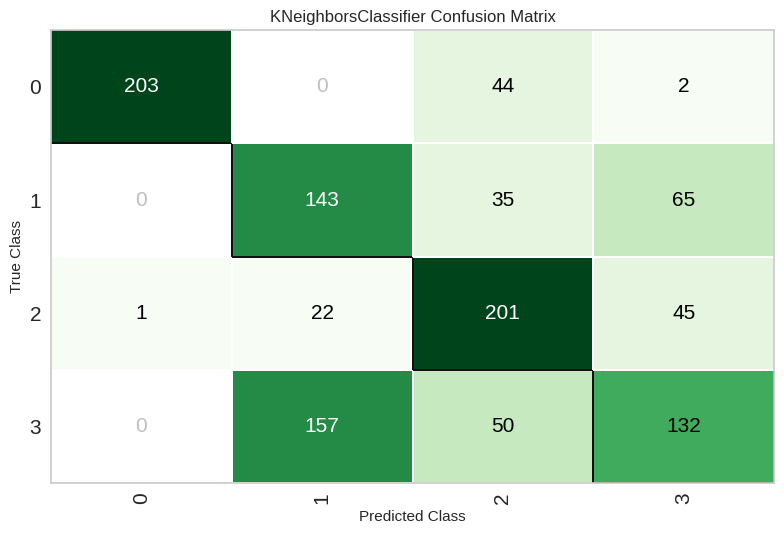

In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

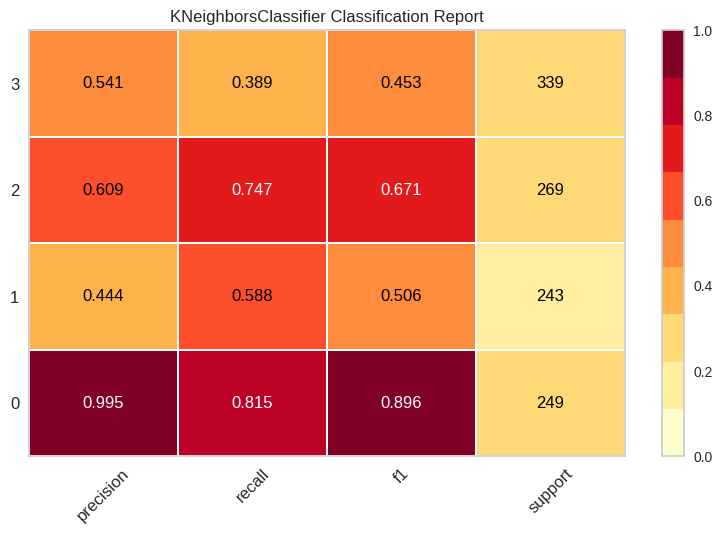

In [ ]:
plot_model(tuned_knn, plot = 'class_report')

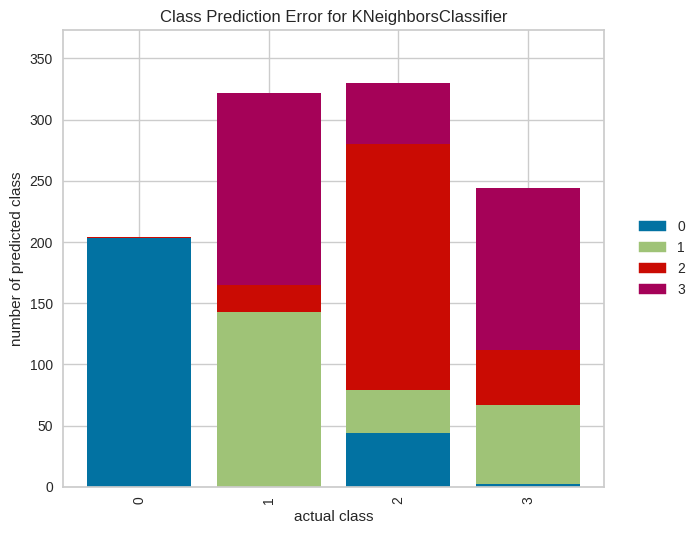

In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
data_test_filtered = data_test.drop(columns=['label', 'source','id', 'model'])


predict_model(tuned_knn, data=data_test_filtered)

,text,text_length,prediction_label,prediction_score
0,How to Make Perfume\n\nPerfume is a great way ...,4729,chatGPT,1.0000
1,Remote Desktop is a useful tool that allows yo...,3568,chatGPT,1.0000
2,How to Make a Photo Page Using Inkscape\n\nDo ...,4445,chatGPT,1.0000
3,Making Phyllo Dough is a skill that will impre...,3056,chatGPT,1.0000
4,Becoming a working actor may seem like a daunt...,2616,davinci,0.6122
...,...,...,...,...
912,Using a density-functional-based transport m...,1496,human,0.4286
913,We introduce a method to constrain general c...,1566,human,0.4694
914,We study bottlebrush macromolecules in a goo...,1265,human,0.4898
915,From observations of almost 500 RGB stars in...,1495,human,0.4082


In [ ]:
final_knn = finalize_model(tuned_knn)

In [ ]:
test_pred = predict_model(final_knn, data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6118,0.8409,0.6118,0.6271,0.6159,0.4784,0.4802


In [ ]:
save_model(final_knn, 'final_knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['text_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                                                               verbose=0))),
                 ('balance',
                  TransformerWrapper(exclude=None, include=None

In [ ]:
loaded_model = load_model('final_knn')

predictions = predict_model(loaded_model, data=data_test)


print(predictions)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6118,0.8409,0.6118,0.6271,0.6159,0.4784,0.4802


                                                  text   source  label     id  \
0    How to Make Perfume\n\nPerfume is a great way ...  wikihow      1      3   
1    Remote Desktop is a useful tool that allows yo...  wikihow      1      9   
2    How to Make a Photo Page Using Inkscape\n\nDo ...  wikihow      1     10   
3    Making Phyllo Dough is a skill that will impre...  wikihow      1     14   
4    Becoming a working actor may seem like a daunt...  wikihow      1     16   
..                                                 ...      ...    ...    ...   
912    Using a density-functional-based transport m...    arxiv      0  37006   
913    We introduce a method to constrain general c...    arxiv      0  37018   
914    We study bottlebrush macromolecules in a goo...    arxiv      0  37020   
915    From observations of almost 500 RGB stars in...    arxiv      0  37021   
916    We study the non-equilibrium relaxation of a...    arxiv      0  37026   

     text_length    model p